<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файлов-с-данными" data-toc-modified-id="Открытие-файлов-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файлов с данными</a></span><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Проведение-исследовательского-анализа-данных" data-toc-modified-id="Проведение-исследовательского-анализа-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведение исследовательского анализа данных</a></span></li><li><span><a href="#Составим-портрет-пользователя-каждого-региона" data-toc-modified-id="Составим-портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составим портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span>

# Описание проекта

Мы работаеи в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В нашем распоряжении данные до 2016 года. 

 Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открытие файлов с данными

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st
pth1 = '/datasets/games.csv'
pth2 = '/content/4_games.csv'
try:
    data = pd.read_csv(pth1)
except:
    data = pd.read_csv(pth2)


## Подготовка данных

In [ ]:
data.tail(10) #выведем первые 10 строчек датасета на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Первое, что бросается в глаза при взгляде на таблицу - это то, что названия столбцов занесены в разных регистрах, переименуем столбцы и приведем их к нижнему регистру.

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns # проверим как сейчас выглядят названия столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
data.info() #посмотрим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data[data['year_of_release'].isnull()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Данные в колонке year_of_release отображаются в дробном формате, приведем значения к целым для удобства работы и экономии памяти. Данные в столбце user_score - это численный показатель, а данные отображаются в формате object, это следует исправить. По остальным столбцам аномалий пока не вижу, посмотрим дальше.

In [ ]:
data['year_of_release'] = data['year_of_release'].fillna(-1) #пропущенные значения в стобце year_of_release заменим на индикатор -1
data['year_of_release'] = data['year_of_release'].astype('int64')
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,   -1, 1995,
       1991, 1981, 1987, 1980, 1983])

In [ ]:
data.isna().sum()/len(data)*100 # проверим есть ли строки с пропущенными значениями и сколько их в процентном соотношении

name                0.011965
platform            0.000000
year_of_release     0.000000
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Много пропущенных значений в колонках:

* critic_score
* user_score
* rating

Следует отметить, что процент пропусков в колонках user_score и rating практически одинаковый, возможно рейтинг основыватся на оценке пользователей.

In [ ]:
data.duplicated().sum() #на всякий случай проверим, есть ли повторяющиеся строки

0

Повторяющиеся строки не найдены.

In [ ]:
data['user_score'].unique() #посмотрим уникальные значения в столбце user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо довольно большого числа пропусков, в данных по этому столбцу присутствует значение `tbd`, по всей видимости оно расшифровывается как to be determined, что значит, что рейтинг еще не определен. Возможно игра только поступила в магазин и еще не имеет оценок от пользователей. Такие данные можно приравнять к пропущенным данным, они имеют схожую природу возникновения. 
Заполнить пропущенные значения медианным или средним числом, на мой взгляд, было бы неправильно, т.к. слишком разные продукты могут иметь неопределенный рейтинг, а по итогам такого заполнения они станут равнозначными. Оставим данные незаполненными, но приведем их к правильному формату float.

In [ ]:
data['user_score'] = data['user_score'].replace('tbd','nan')
data['user_score'] = data['user_score'].astype(float)


In [ ]:
data['user_score'].unique() #проверим что получилось, после проведенных изменений

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
data.isna().sum()/len(data)*100 #посмотрим как изменилось количество пропусков

name                0.011965
platform            0.000000
year_of_release     0.000000
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [ ]:
data['rating'].unique() #посмотрим уникальные значения столбца с рейтингом ESRB 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Отсутствующие данные в колонке с оценкой критиков,также как и в случае с пользовательскими оценками, заменить усредненными или медианными значениями было бы неправильно, также не будем заполнять отсутствующие данные.
В случае с рейтингом пропущенные значения поменяем на NoRating, данные могут отсутсвовать по разным причинам: например, игра вышла слишком давно и тогда такого рейтинга еще не существовало или, например, не набрано достаточного количества отзывов от пользователей или критиков для формирования рейтинга.

In [ ]:
data['rating'] = data['rating'].fillna('NoRate')

Отсутствующие данные в колонках name и genre заполним значениями NoName и NoGenre сответсвенно.

In [ ]:
data['name'] = data['name'].fillna('NoName')
data['genre'] = data['genre'].fillna('NoGenre')

In [ ]:
data.isna().sum()/len(data)*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating              0.000000
dtype: float64

Посчитаем суммарные продажи во всех регионах и добавим их в отдельный столбец с данными.

In [ ]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NoRate,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NoRate,31.38


In [ ]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

## Проведение исследовательского анализа данных

Посмотрим распределение количества игр по годам. Для наглядности построим bar_plot диаграмму.

Text(0, 0.5, 'Количество игр')

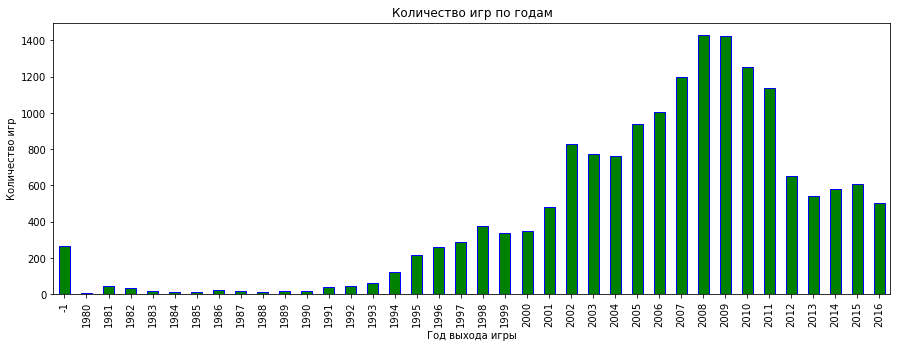

In [ ]:
(data.groupby('year_of_release')['year_of_release']
 .count().plot
 .bar(color='green',edgecolor='blue',figsize=(15,5)).set_title('Количество игр по годам')
);
plt.xlabel('Год выхода игры')
plt.ylabel('Количество игр')

Распределение по годам показывает максимальное число выпущенных игр в 2002 - 2011 годах, до 1995 года количество игр было совсем незначительным, а после 2012 года произошло резкое падение этого показателя. Возможной причиной можно рассматривать развитие мобильных технологий. Возможно данными до 1995 года следует пренебречь. Отдельно отметим, что число игр с неопределенным годом выпуска является незначительным, индикатор -1 наглядно отражает, что доля таких игр невысокая - менее 300 единиц. Такими данными также можно будет пренебречь.

Далее посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

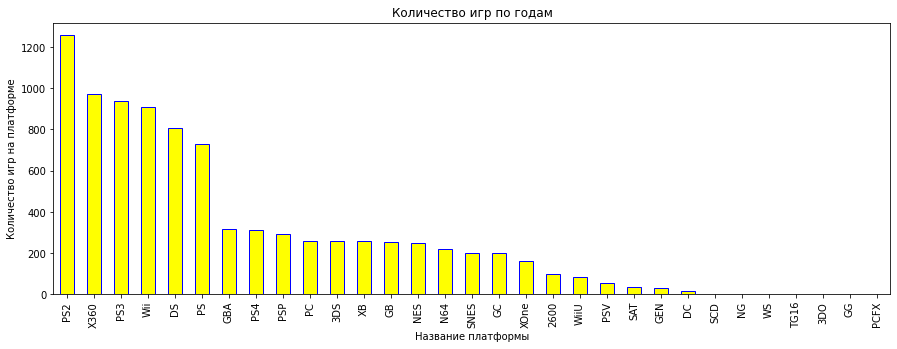

In [ ]:
(data.groupby('platform')['total_sales']
 .sum().sort_values(ascending=False)
 .plot.bar(color='yellow',edgecolor='blue',figsize=(15,5))
 .set_title('Количество игр по годам')
);
plt.xlabel('Название платформы')
plt.ylabel('Количество игр на платформе');

Платформами с наибольшими продажами ( более 400 млн. долларов) являются:
* PS2
* X360
* PS3
* Wii
* DS
* PS

Посмотрим как распределялись продажи по этим шести платформам по годам.

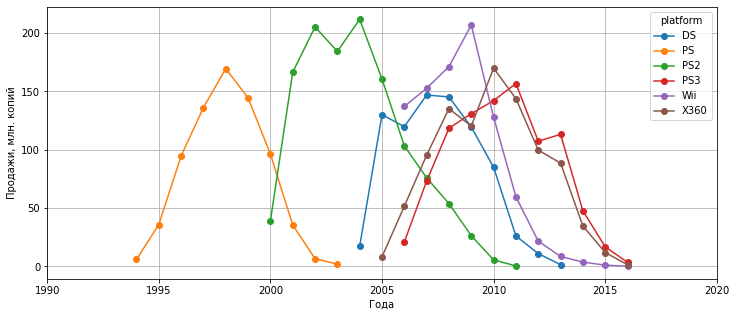

In [ ]:
%matplotlib inline
data_by_platform = data.query('platform in ["PS2","X360","PS3","Wii","DS","PS"]')
(data_by_platform
 .pivot_table(index='year_of_release', columns='platform',values='total_sales',aggfunc='sum')
 .plot(kind='line',style='o-',grid=True, figsize=(12,5))
)
plt.xlim(1990, 2020)
plt.xlabel('Года')
plt.ylabel('Продажи, млн. копий');


Судя по полученным графикам, жизненный цикл одной платформы не очень долог - около 10 лет. В течение первых пяти лет жизни платформа достигает максимума по выручаемым на ней средствам, а следующие 5 лет происходит спад.

Для дальнейшего анализа на мой взгляд нужно взять период с 2006 по 2016 год, поскольку в 2006 году вышли все наиболее популярные к актуальному 2016 году платформы.

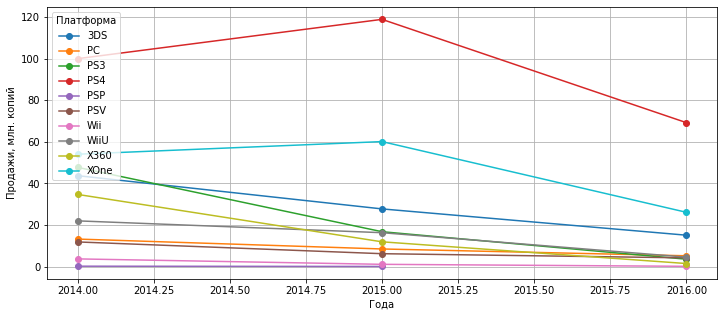

In [ ]:
data_after_2005 = data.query('year_of_release>2013')
(data_after_2005
 .pivot_table(index='year_of_release', columns='platform',values='total_sales',aggfunc='sum')
 .plot(kind='line',style='o-',grid=True, figsize=(12,5))
);
plt.xlabel('Года')
plt.ylabel('Продажи, млн. копий')
plt.legend(title='Платформа', loc='upper left');

Из графика видно, что все платформы на текущем этапе находятся в периоде падения продаж. Наиболее прибыльными на данный момент всё еще можно назвать:
* PS4
* XOne
* 3DS

Но продажи по этим платформам также уже прошли свой пик, что свидетельствует о том, что весь рынок игр переживает падение.

Посмотрим диаграмму распределения для всех игр.

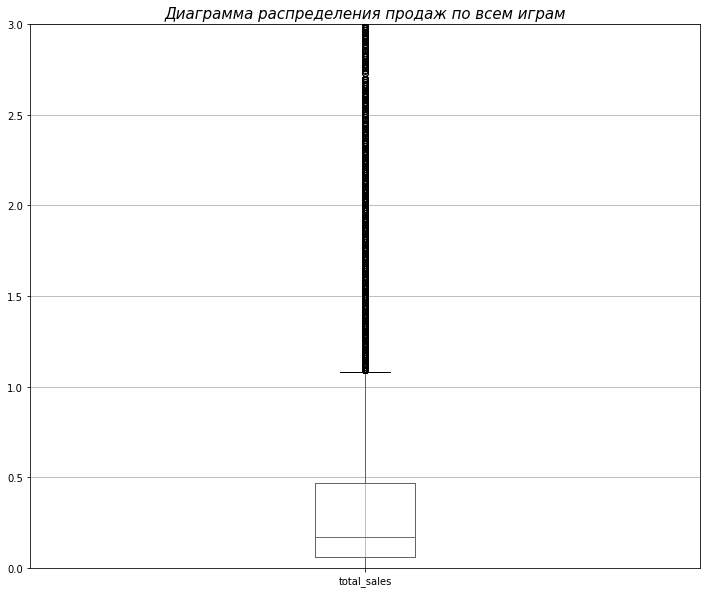

In [ ]:
data.boxplot(column='total_sales', figsize=(12,10))
plt.title('Диаграмма распределения продаж по всем играм',fontsize=15,fontstyle='italic')   
plt.ylim(0,3);

Медианное значение выручки по глобальным продажам для всех игр находится в районе 0,2 млн. долларов для предложенной выборки данных.

Теперь проверим распределение для шести наиболее прибыльных платформ.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


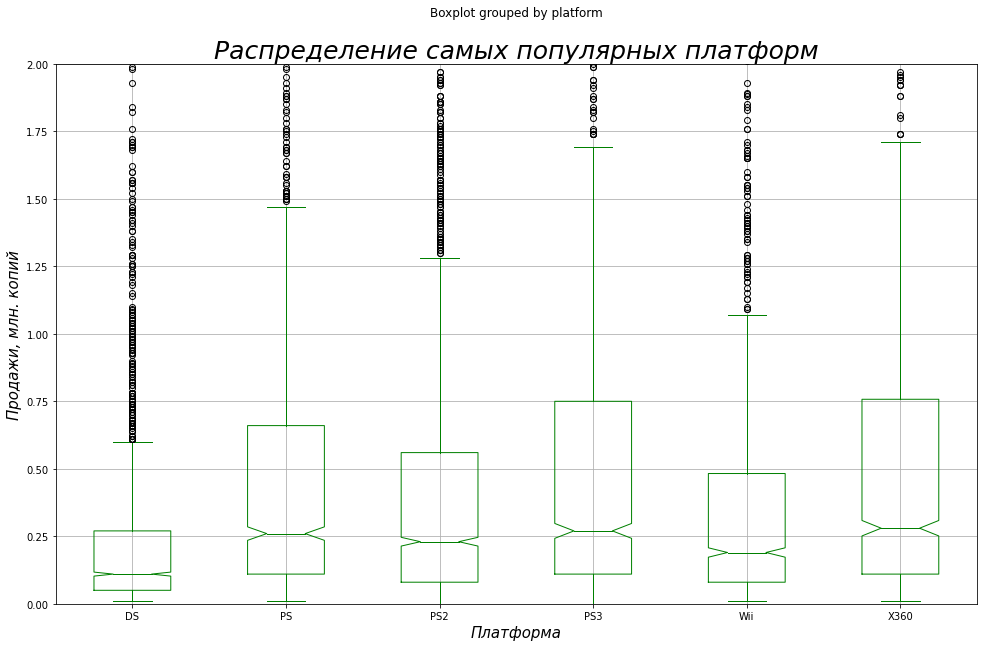

In [ ]:
platforms_list = ['PS2','X360','PS3','Wii','DS','PS']
(data.query('platform in @platforms_list')
 .boxplot(column='total_sales', by='platform',notch=True,figsize=(16,10), color='green')
);
plt.ylim(0, 2)
plt.title('Распределение самых популярных платформ',fontsize=25,fontstyle='italic')   
plt.xlabel('Платформа',fontsize=15,fontstyle='italic');
plt.ylabel('Продажи, млн. копий',fontsize=15,fontstyle='italic');


Медианные значения продаж для наиболее популярных платформ подтверждают результаты по общей выборке - медианные значения здесь колеблются в пределах 0,2 - 0,25 млн долларов. Верхняяя граница пределов самая высокая у платформ PS3 и X360, она находится в районе 1,7 млн. долларов. Самые низкие показатели у DS - здесь верхняяя граница находится в районе 0,6 млн. долларов.

Для дальнейшего анализа возьмем самую популярную платформу X360 и проверим как влияют на продажи игр внутри этой группы отзывы критиков и пользователей.

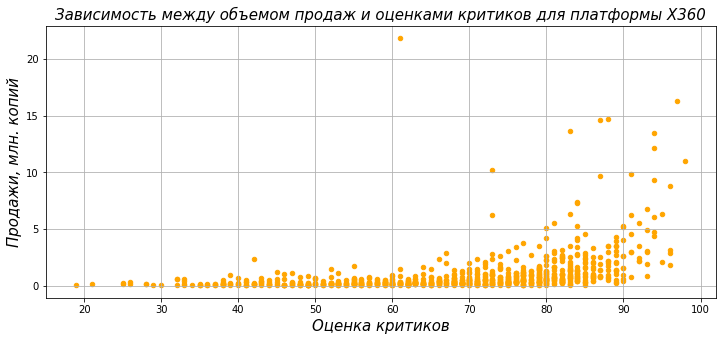

In [ ]:
(data.query('platform == "X360"')
 .plot(kind='scatter',x='critic_score',y='total_sales', grid=True, figsize=(12,5),color='orange')
);
plt.title('Зависимость между объемом продаж и оценками критиков для платформы X360',fontsize=15,fontstyle='italic');
plt.xlabel('Оценка критиков',fontsize=15,fontstyle='italic')
plt.ylabel('Продажи, млн. копий',fontsize=15,fontstyle='italic');


Диаграмма рассеивания показывает прямую зависимость между объемом продаж и оценкой критиков - чем выше оценка, тем больше продается копий игр, работающих на платформе X360. Визуально зависимость довольно умеренная, это подтверждается коэффициентом корреляции, рассчитанным ниже.

In [ ]:
corr_data = data.query('platform == "X360"')
corr_data['critic_score'].corr(corr_data['total_sales'])

0.3937358653072588

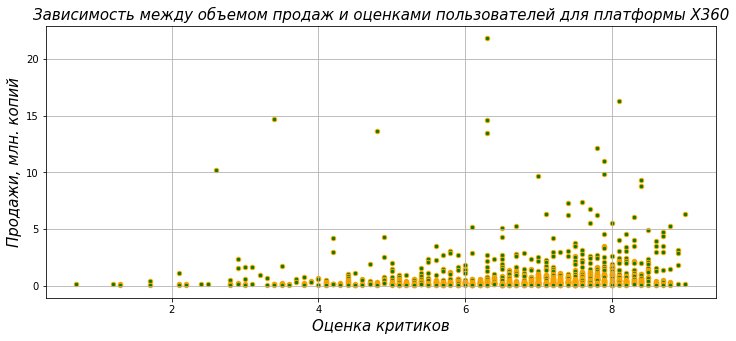

In [ ]:
(data.query('platform == "X360"')
 .plot(kind='scatter',x='user_score',y='total_sales', grid=True, figsize=(12,5),ec='orange', color='green')
);
plt.title('Зависимость между объемом продаж и оценками пользователей для платформы X360',fontsize=15,fontstyle='italic');
plt.xlabel('Оценка критиков',fontsize=15,fontstyle='italic')
plt.ylabel('Продажи, млн. копий',fontsize=15,fontstyle='italic');

По всей видимости оценка пользователей также влияет на объем продаж, но эта зависимость ниже, чем в случае с оценками критиков.
Это подтверждается величиной коэффициента корреляции, который в 3 раза ниже аналогичного показателя для оценки критиков.

In [ ]:
corr_data['user_score'].corr(corr_data['total_sales'])

0.11445882978454185

Взаимосвязь между объемом продаж и оценками критиков и пользователей для всего датасета менее выраженная, чем для топовой платформы, это же подтверждают меньшие значения коэффициентов корреляции, но общая тенденция сохраняется - зависимость, хоть и небольшая, но есть. Ниже приведены соответствующие диаграммы распределения и расчеты коэффициентов корреляции.

Коэффициент корреляции: 0.08817911987579136


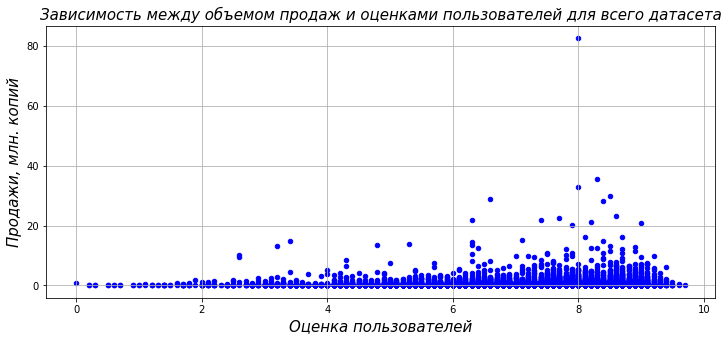

In [ ]:
data.plot(kind='scatter',x='user_score',y='total_sales', grid=True, figsize=(12,5),color='blue')
print (f"Коэффициент корреляции: {data['user_score'].corr(data['total_sales'])}")
plt.title('Зависимость между объемом продаж и оценками пользователей для всего датасета',fontsize=15,fontstyle='italic');
plt.xlabel('Оценка пользователей',fontsize=15,fontstyle='italic')
plt.ylabel('Продажи, млн. копий',fontsize=15,fontstyle='italic');

Коэффициент корреляции: 0.24550668717736324


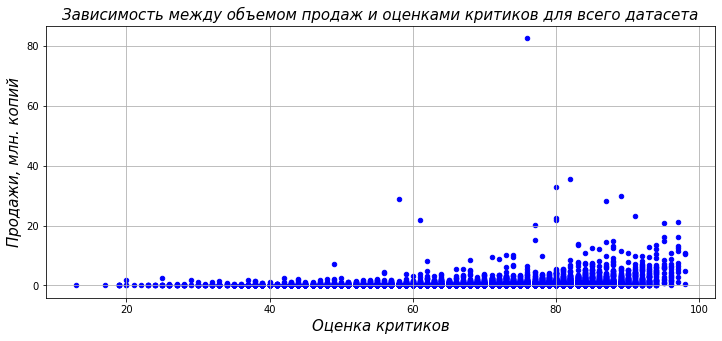

In [ ]:
data.plot(kind='scatter',x='critic_score',y='total_sales', grid=True, figsize=(12,5),color='blue')
print (f"Коэффициент корреляции: {data['critic_score'].corr(data['total_sales'])}")
plt.title('Зависимость между объемом продаж и оценками критиков для всего датасета',fontsize=15,fontstyle='italic');
plt.xlabel('Оценка критиков',fontsize=15,fontstyle='italic')
plt.ylabel('Продажи, млн. копий',fontsize=15,fontstyle='italic');

In [ ]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дополнительно к X360 построим диаграммы рассеяния для оставшихся пяти платформ из Топ-6 (DS,PS,PS2,PS3,Wii)

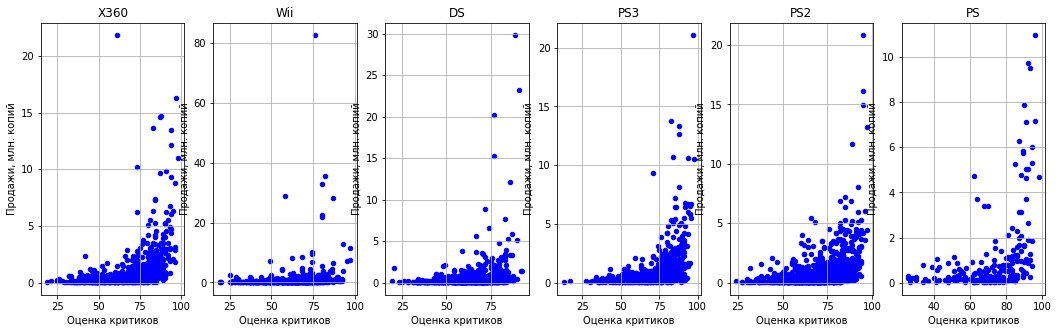

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(25,10))
top_platforms = ['X360','Wii','DS', 'PS3', 'PS2', 'PS']
i=0
for platform in top_platforms:
    (data[data['platform']==platform]
    .plot(kind='scatter',x='critic_score',y='total_sales', 
    grid=True, figsize=(18,5),color='blue',ax=axes[i],title= platform,
    ylabel='Продажи, млн. копий',xlabel='Оценка критиков')
    )
    i+=1
   

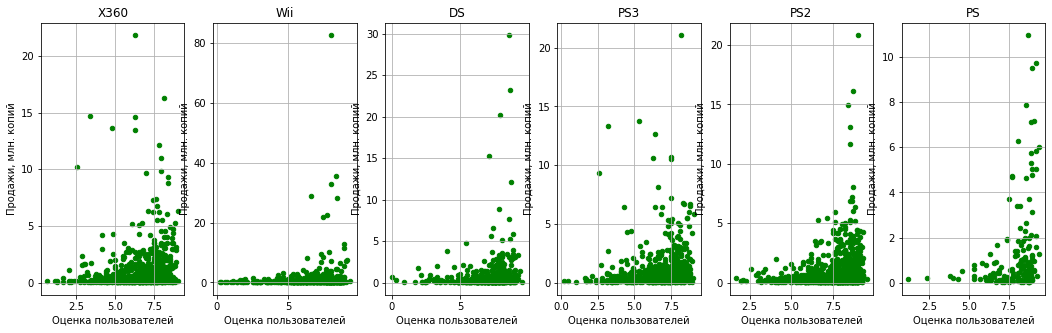

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(25,10))
top_platforms = ['X360','Wii','DS', 'PS3', 'PS2', 'PS']
i=0
for platform in top_platforms:
    (data[data['platform']==platform]
    .plot(kind='scatter',x='user_score',y='total_sales', 
    grid=True, figsize=(18,5),color='green',ax=axes[i],title= platform,
    ylabel='Продажи, млн. копий',xlabel='Оценка пользователей')
    )
    i+=1

Полученные диаграммы наглядно подтверждают наличие прямой зависимости между оценками пользователей и критиков и количеством проданных копий продукции. Данное утверждение верно для шести самымх популярных платформ в выборке.

Изучим распределение продаж по жанрам игр.

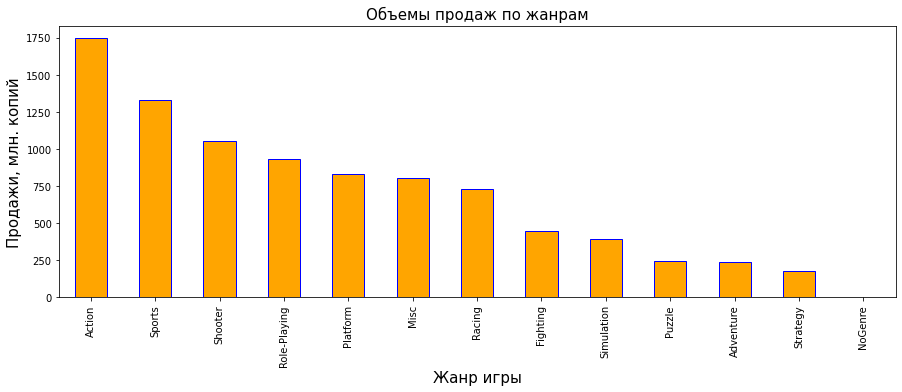

In [ ]:
(data.groupby('genre')['total_sales']
 .sum().sort_values(ascending=False)
 .plot.bar(color='orange',edgecolor='blue',figsize=(15,5))
 .set_title('Объемы продаж по жанрам', fontsize=15)
);
plt.xlabel('Жанр игры',fontsize=15)
plt.ylabel('Продажи, млн. копий',fontsize=15);

Самыми прибыльными являются Экшн игры, спортивные игры и стрелялки - чем более азартен человек, тем больше денег он готов потратить на виртуальную реальность :) А вот стратегиченские игры и паззлы не очень популярны, судя по долям в общем объеме продаж.

Построим диаграммы размаха для всех игровых жанров.

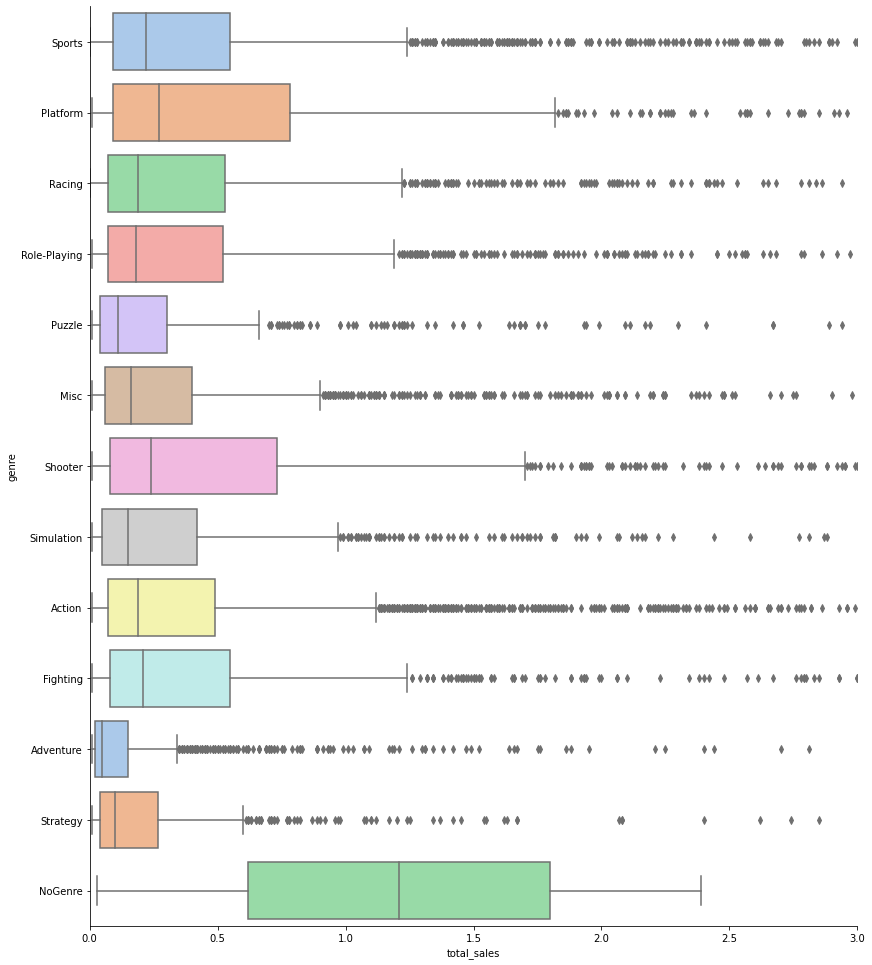

In [ ]:
g = sns.catplot(y='genre', x='total_sales', kind="box", data=data, orient='h', palette = 'pastel')
g.fig.set_figwidth(15)
g.fig.set_figheight(15)
plt.xlim(0, 3);


Исходя из анализа медианных значений, наиболее стабильные прибыли приносят игры в жанрах шутеров и платформенные игры. Отдельным блоком наиболее прибыльных игр стоит выделить игры, которые не имеют присвоенного значения жанра.

## Составим портрет пользователя каждого региона


Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

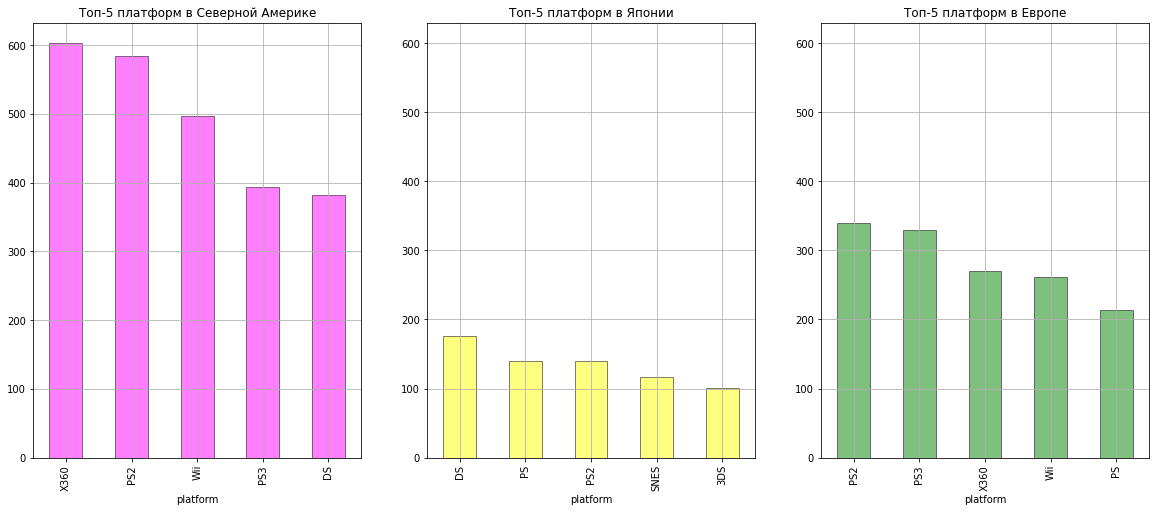

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,10))
na_pop_platforms = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
(na_pop_platforms.plot
 .bar(figsize=(20,8),color='magenta',edgecolor='black', 
      grid=True,alpha=0.5,ax=axes[0],title='Топ-5 платформ в Северной Америке')
);

jp_pop_platforms = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]
(jp_pop_platforms.plot
 .bar(color='yellow', alpha=0.5, edgecolor='black', 
      grid=True,ax=axes[1],title='Топ-5 платформ в Японии',ylim=(0,630))
);

eu_pop_platforms = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
(eu_pop_platforms.plot
.bar(color='green',edgecolor='black', 
     grid=True, alpha=0.5,ax=axes[2],title='Топ-5 платформ в Европе',ylim=(0,630))
);



В Северной Америке и Европе набор топовых позиций практически одинаковый с небольшими различиями по долям продаж в Европе, где рынок практически в 2 раза менее емкий, чем в Америке. В Японии объем продаж еще меньше - около половины от продаж в Европе, и здесь популярностью пользуются также местные платформы SNES и 3DS, хотя и здесь они существенно проигрывают различным версиям PlayStation.

Найдем топ-5 порулярных игровых жанров для каждого региона.

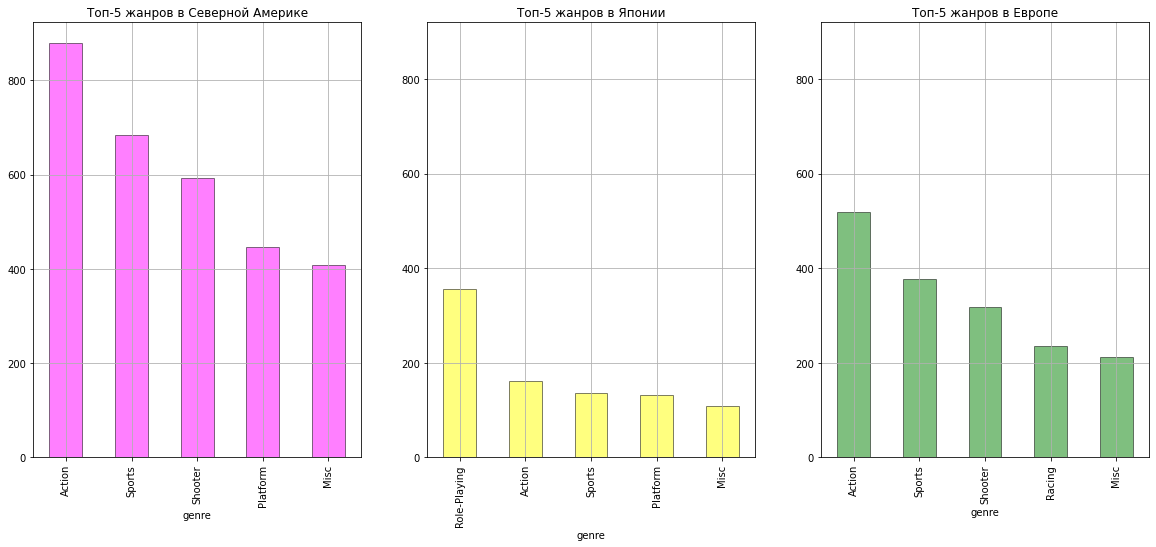

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,10))
na_pop_platforms = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
(na_pop_platforms.plot
 .bar(figsize=(20,8),color='magenta',edgecolor='black', 
      grid=True,alpha=0.5,ax=axes[0],title='Топ-5 жанров в Северной Америке')
);

jp_pop_platforms = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]
(jp_pop_platforms.plot
 .bar(color='yellow', alpha=0.5, edgecolor='black', 
      grid=True,ax=axes[1],title='Топ-5 жанров в Японии',ylim=(0,920))
);

eu_pop_platforms = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
(eu_pop_platforms.plot
.bar(color='green',edgecolor='black', 
     grid=True, alpha=0.5,ax=axes[2],title='Топ-5 жанров в Европе',ylim=(0,920))
);


Распределения для Америки и Европы снова очень схожи - экшн, спортивные игры и стрелялки здесь на первых местах. В Японии же вкусы другие, здесь на первом месте лидируют ролевые игры, причем с большим отрывом, а на следующих местах из Топ-3 тенденции повторяют общемировые - Экшн и спортивные игры также популярны.

Проверим влиянение рейтинга ESRB на продажи в отдельном регионе.

In [ ]:
data['rating'].unique()

array(['E', 'NoRate', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Сделаем расшифровку каждой категории.

In [ ]:
ESRB_dict = {'E':'Для всех', 'NoRate':'NoRate', 'M':'Для взрослых', 'T':'Подросткам', 
             'E10+':'Для всех >= 10 лет', 'K-A':'Kids to Adults', 'AO':'Только для взрослых', 
             'EC':'Для детей младшего возраста', 'RP':'Рейтинг ожидается'}

In [ ]:
data['ESRB'] = data['rating'].map(ESRB_dict) #создадим новый столбец с данными
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NoRate,40.24,NoRate
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NoRate,31.38,NoRate


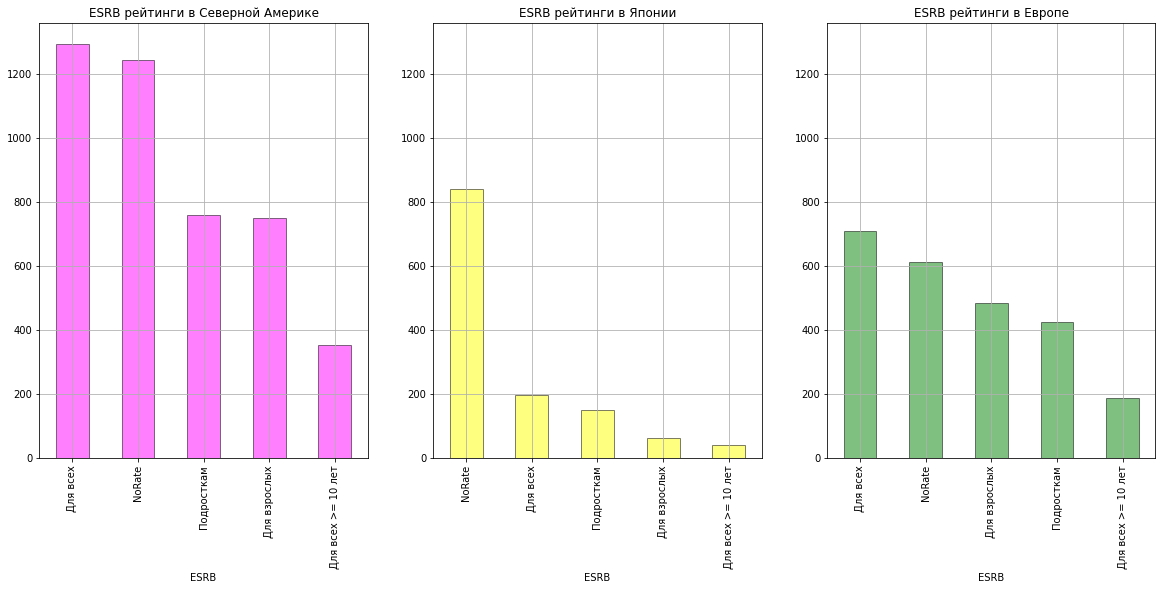

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,10))
na_pop_platforms = data.groupby('ESRB')['na_sales'].sum().sort_values(ascending=False)[:5]
(na_pop_platforms.plot
 .bar(figsize=(20,8),color='magenta',edgecolor='black', 
      grid=True,alpha=0.5,ax=axes[0],title='ESRB рейтинги в Северной Америке')
);

jp_pop_platforms = data.groupby('ESRB')['jp_sales'].sum().sort_values(ascending=False)[:5]
(jp_pop_platforms.plot
 .bar(color='yellow', alpha=0.5, edgecolor='black', 
      grid=True,ax=axes[1],title='ESRB рейтинги в Японии',ylim=(0,1360))
);

eu_pop_platforms = data.groupby('ESRB')['eu_sales'].sum().sort_values(ascending=False)[:5]
(eu_pop_platforms.plot
.bar(color='green',edgecolor='black', 
     grid=True, alpha=0.5,ax=axes[2],title='ESRB рейтинги в Европе',ylim=(0,1360))
);


Самые большие доходы разработчики получают от игр категории "Для всех", второе место делят между собой подростковые игры и игры для взрослых. Стоит отметить, что большая часть игр совсем не имеет рейтинга ESRB. Это может быть вызвано с тем, что рейтинг ESRB начали использовать только с 2002 года, а в Японии этот рейтинг совсем не популярен, возможно там есть свои критерии возрастного ценза на игры.

## Проверка гипотез
* 	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* 	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам в обоих случаях воспользуемся специальным методом ttest_ind. Дисперсии в выборках будем считать одинаковыми, параметр equal_var по умолчанию будет указан как True.

Нулевая гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [ ]:
xbox = data[(data['platform']=='XOne')&(data['user_score']>0)]['user_score'] #выборка по пользовательскому рейтингу для Xbox One
pc = data[(data['platform']=='PC')&(data['user_score']>0)]['user_score'] #выборка по пользовательскому рейтингу для PC
alpha = .05 # уровень статистической значимости
results = st.ttest_ind(xbox,pc)
print(f'p-значение:{results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:1.3896435533548819e-05
Отвергаем нулевую гипотезу


На основании полученного результата отвергаем нулевую гипотезу, данные в выборках не противоречат альтернативной гипотезе о том, что платформы Xbox и PC имеют разные средние пользовательские оценки.

Нулевая гипотеза:Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
action = data[(data['genre']=='Action')&(data['user_score']>0)]['user_score'] #выборка по пользовательскому рейтингу для Xbox One
sports = data[(data['genre']=='Sports')&(data['user_score']>0)]['user_score'] #выборка по пользовательскому рейтингу для PC
alpha = .05 # уровень статистической значимости
results = st.ttest_ind(action,sports)
print(f'p-значение:{results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value (0.10406951359049141) говорит о том, что вероятность получить такое или большее различие случайно более 10%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими оценками игр в жанрах Action и Sports.

## Общий вывод

Проведенный исследовательский анализ данных показал, что на рынке игровых платформ на конец 2016 года происходил значительный спад, связанный по всей видимости с увеличивающейся популярностью мобильных игровых приложений. Для акселлерации продаж нашему интернет магазину следует сделать упор на наиболее популярные игровые платформы, опираясь главным образом на оценки критиков, т.к. они с наибольшей долей вероятности могут гарантировать высокие объемы продаж.  При выборе игр для каждой популярной платформы следует отдать предпочтение играм в жанрах Action и Sports. Желательно избегать возрастных ограничений, применяемых к играм, поскольку каждое такое ограничение отрезает часть потенциальных покупателей.

Дополнрительно порекомендуем нашему рекламному отделу обратить свое внимание на Северную Америку. В качестве целевой игры нужно использовать игру в жанре Platform ( такие игры в среднем продаются стабильно чаще)  на платформе PS4, как наиболее прибыльной платформе на конец 2016 года. При выборе игры следует обращать внимание на отзывы критиков в большей мере, чем на отзывы пользователей. По части квалификации игры в рейтинге ESRB рекомендуется выбирать категорию "E"(для всех).
     Ниже представлена выборка игр, подходящих под указанные параметры. На мой взгляд стоит обратить свое внимание на игру Shovel Knight при планировании бюджета на 2017 год.

In [ ]:
data.query('(platform == "PS4") & (genre == "Platform") & (rating == "E")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB
908,LittleBigPlanet 3,PS4,2014,Platform,0.66,0.93,0.01,0.31,79.0,7.1,E,1.91,Для всех
6448,Tearaway Unfolded,PS4,2015,Platform,0.09,0.13,0.00,0.04,81.0,8.1,E,0.26,Для всех
11379,Shovel Knight,PS4,2015,Platform,0.03,0.03,0.00,0.01,90.0,7.6,E,0.07,Для всех
11419,Mega Man Legacy Collection,PS4,2016,Platform,0.07,0.00,0.00,0.02,77.0,6.1,E,0.09,Для всех
